## LINK PENJELASAN: https://binusianorg-my.sharepoint.com/personal/jovian_yanto_binus_ac_id/_layouts/15/guestaccess.aspx?share=ESfdW1JQs4hOnfHN43tBK0wBVgsjCx_1VpfZwVBebtngWw&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=xTqrDM

In [1]:
import pandas as pd
import numpy as np

## Import Dataset

In [6]:
import tensorflow.keras.datasets.fashion_mnist  # for Fashion MNIST dataset

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Filter the data according to labels in the case: 4 (Coat) and 5 (Sandal)

In [13]:
train_mask = (y_train == 4) | (y_train == 5)

# Filter train data for labels 4 (Coat) and 5 (Sandal)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

# Filter test data for labels 4 (Coat) and 5 (Sandal)
test_mask = (y_test == 4) | (y_test == 5)
X_test = X_test[test_mask]
y_test = y_test[test_mask]

## We will be using both training and testing data from mnist_fashion and combine them into 1 dataset and will split later

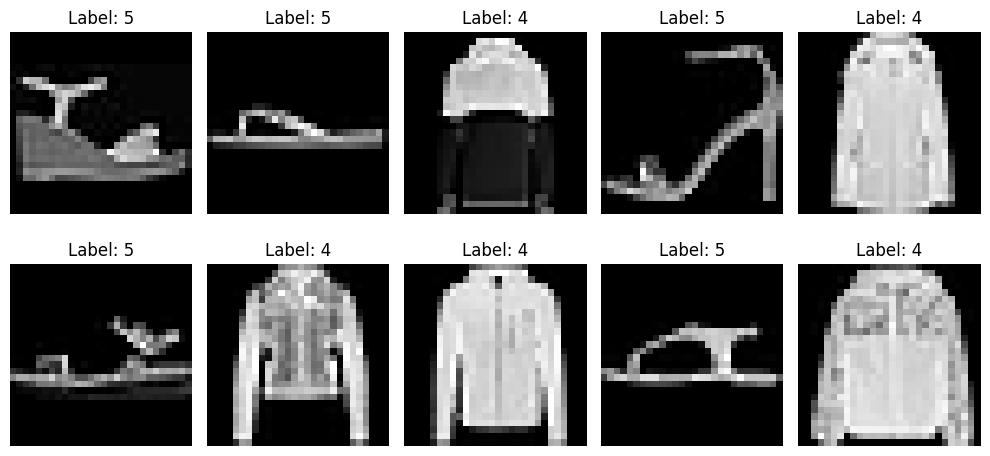

In [24]:
X_filtered = np.concatenate([X_train, X_test], axis=0)
y_filtered = np.concatenate([y_train, y_test], axis=0)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.random.randint(0, X_filtered.shape[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_filtered[idx], cmap='gray')
    plt.title(f'Label: {y_filtered[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Normalizing the data pixels and adding channel dimensino for bcs we will be using Conv2D

In [25]:
# Normalize and reshape data for autoencoder
X_filtered = X_filtered.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
X_filtered = np.expand_dims(X_filtered, axis=-1)  # Add channel dimension

print("Shape of filtered data:", X_filtered.shape)

Shape of filtered data: (14000, 28, 28, 1)


## Splitting the dataset into 80% Training, 10% Valiadtion, %10 Testing

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Building the Architecture

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import tensorflow.keras.datasets.fashion_mnist  # Importing Fashion MNIST dataset

model = Sequential()

# Encoder
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Decoder
model.add(Dense(6272, activation='relu'))
model.add(Reshape((14, 14, 32)))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,621,889 (6.19 MB)

 Trainable params: 1,621,889 (6.19 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [31]:
# Train the autoencoder
model.fit(X_train, X_train,
          epochs=10,
          batch_size=128,
          shuffle=True,
          validation_data=(X_val, X_val))

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - loss: 0.0744 - val_loss: 0.0243
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - loss: 0.0222 - val_loss: 0.0173
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - loss: 0.0165 - val_loss: 0.0140
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - loss: 0.0136 - val_loss: 0.0121
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - loss: 0.0118 - val_loss: 0.0111
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - loss: 0.0107 - val_loss: 0.0101
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - loss: 0.0080 - val_loss: 0.0080


## Model Prediction and Evaluation

### Train prediction

In [43]:
X_train_pred = model.predict(X_train)

350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


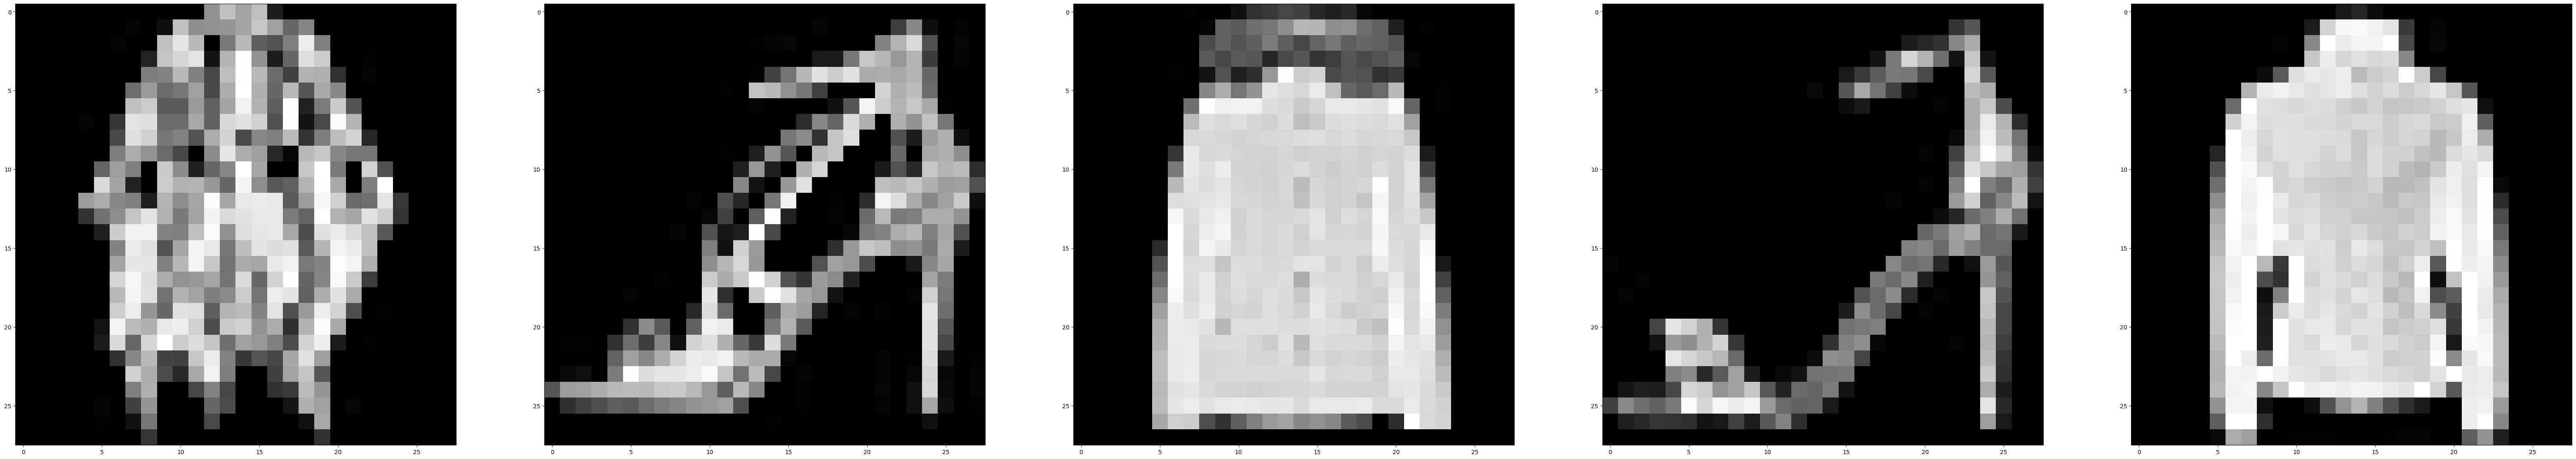

In [51]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
plt.show()

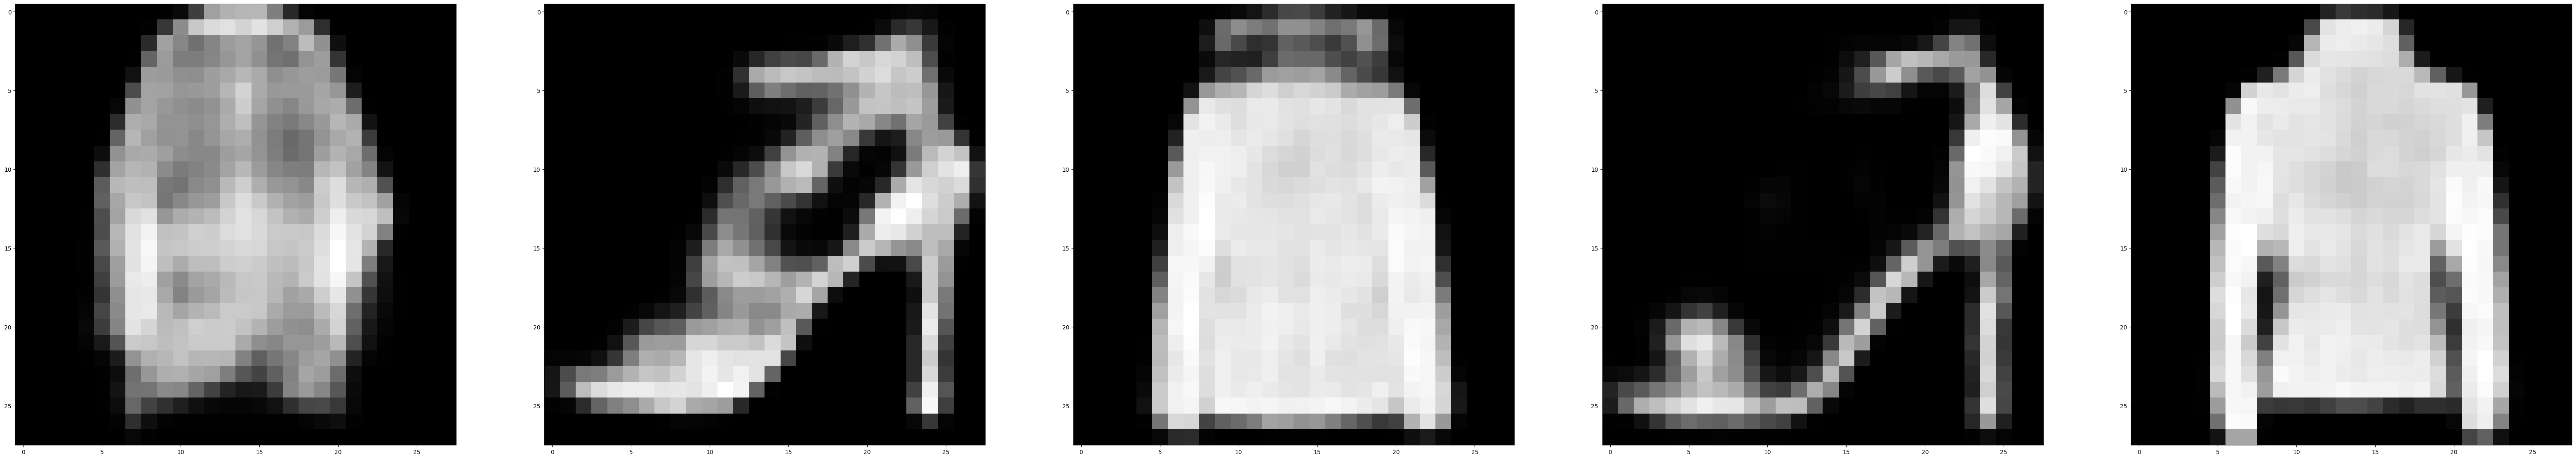

In [52]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_train_pred[i].reshape(28, 28), cmap='gray')
plt.show()

### test prediction

In [39]:
X_test_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


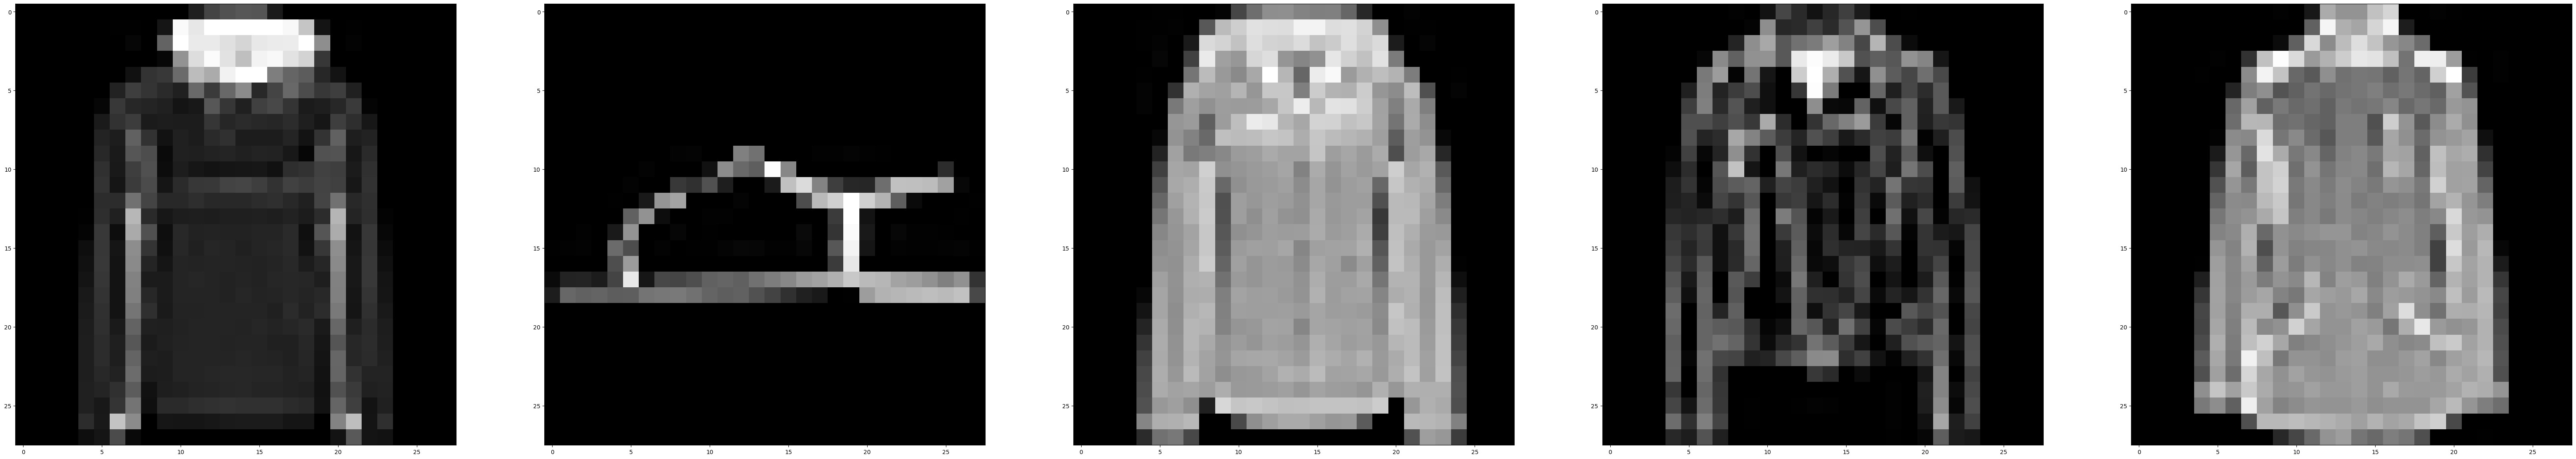

In [40]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.show()

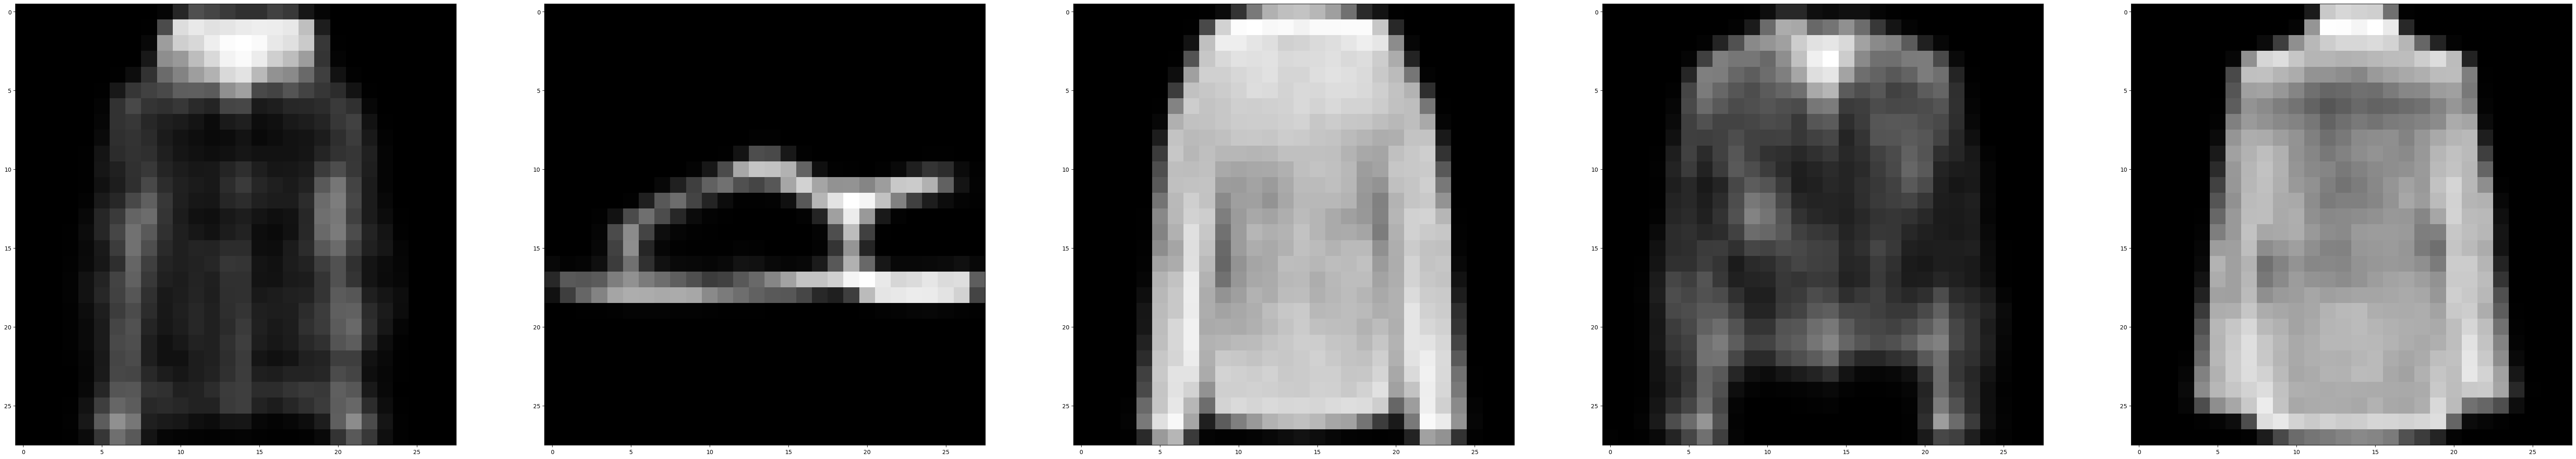

In [41]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_test_pred[i].reshape(28, 28), cmap='gray')
plt.show()

### SSIM for train

In [53]:
from skimage.metrics import structural_similarity as ssim
ssim_scores = [ssim(X_train[i].squeeze(), X_train_pred[i].squeeze(), data_range=1.0) for i in range(len(X_train))]

# Average SSIM score
mean_ssim = np.mean(ssim_scores)
print("Mean SSIM:", mean_ssim)

Mean SSIM: 0.81806426768097


### SSIM for test

In [42]:
ssim_scores = [ssim(X_test[i].squeeze(), X_test_pred[i].squeeze(), data_range=1.0) for i in range(len(X_test))]

# Average SSIM score
mean_ssim = np.mean(ssim_scores)
print("Mean SSIM:", mean_ssim)

Mean SSIM: 0.808940908539938


# Adding Noise for image denoising 
- Its unnecessary but to make a robust dimensional reduction we can train noisy images

### Adding noise to the dataset

In [62]:
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_val_noisy = X_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_val.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip values to be between 0 and 1
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_val_noisy = np.clip(X_val_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

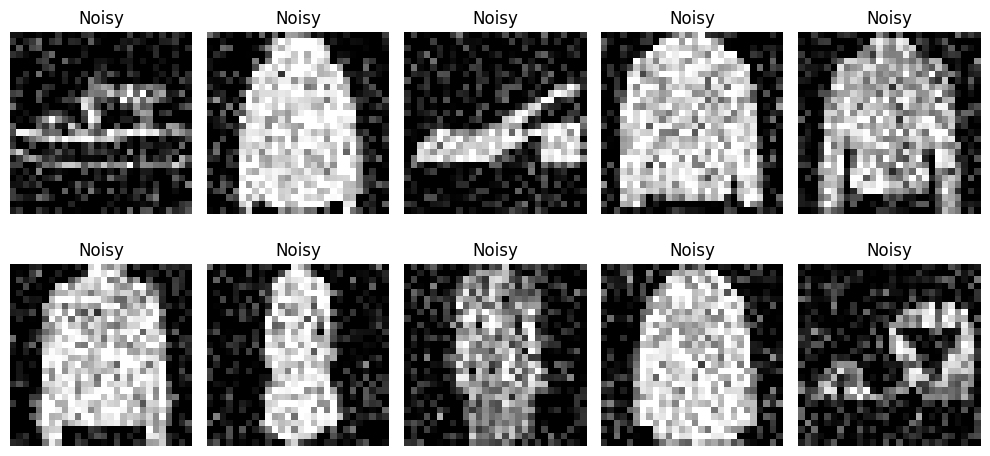

In [63]:
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.random.randint(0, X_train_noisy.shape[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_noisy[idx].squeeze(), cmap='gray')
    plt.title('Noisy')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Training with noisy images using same architecture

In [64]:
model.fit(X_train_noisy, X_train,
          epochs=10,
          batch_size=128,
          shuffle=True,
          validation_data=(X_val_noisy, X_val))

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - loss: 0.0259 - val_loss: 0.0118
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - loss: 0.0090 - val_loss: 0.0094
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - loss: 0.0087 - val_loss: 0.0093
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - loss: 0.0084 - val_loss: 0.0092
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - loss: 0.0083 - val_loss: 0.0091
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - loss: 0.0081 - val_loss: 0.0090


## Noisy Images Prediction and Evaluation

In [65]:
X_train_noisy_pred = model.predict(X_train_noisy)

350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step


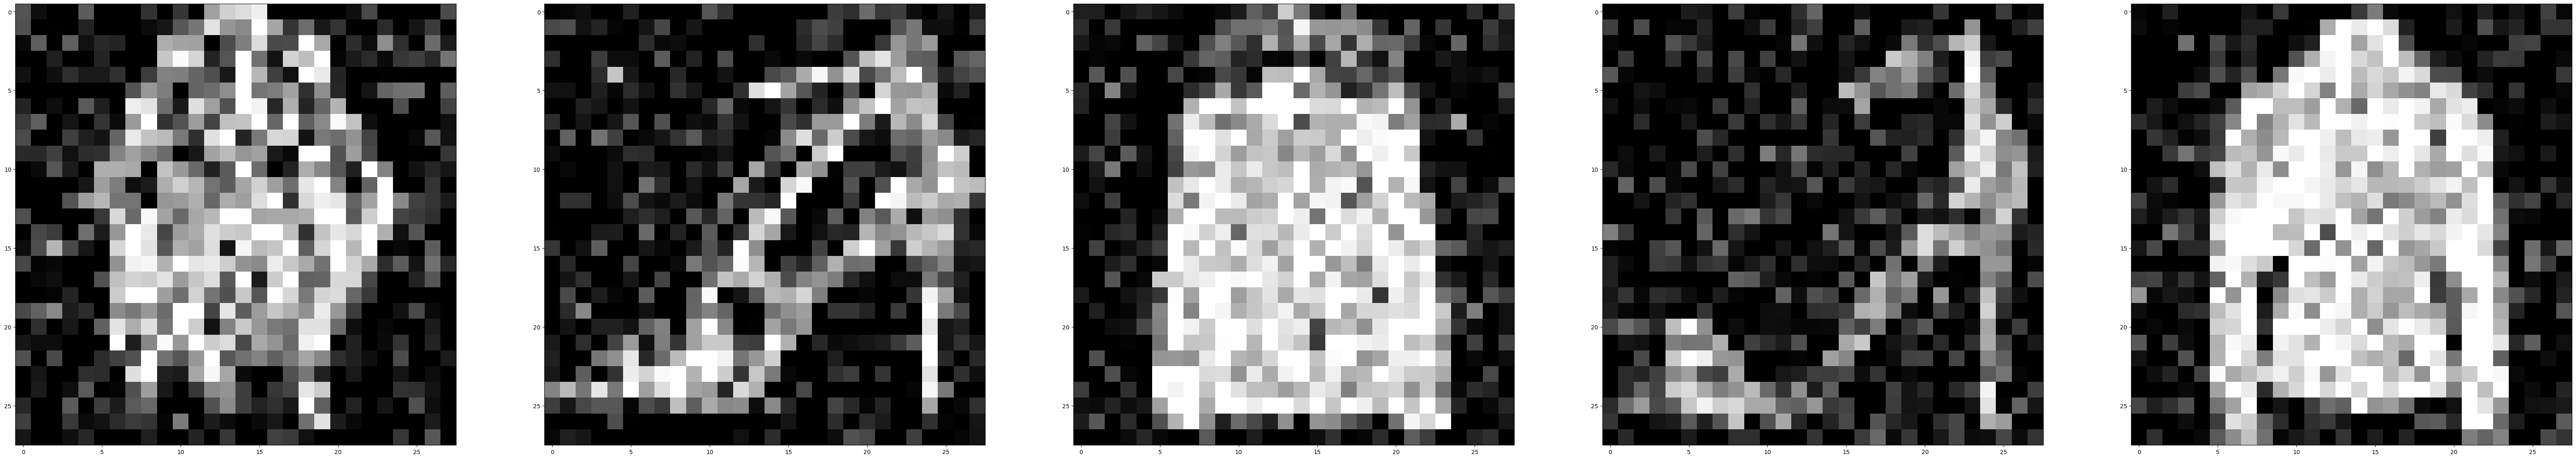

In [66]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_train_noisy[i].reshape(28, 28), cmap='gray')
plt.show()

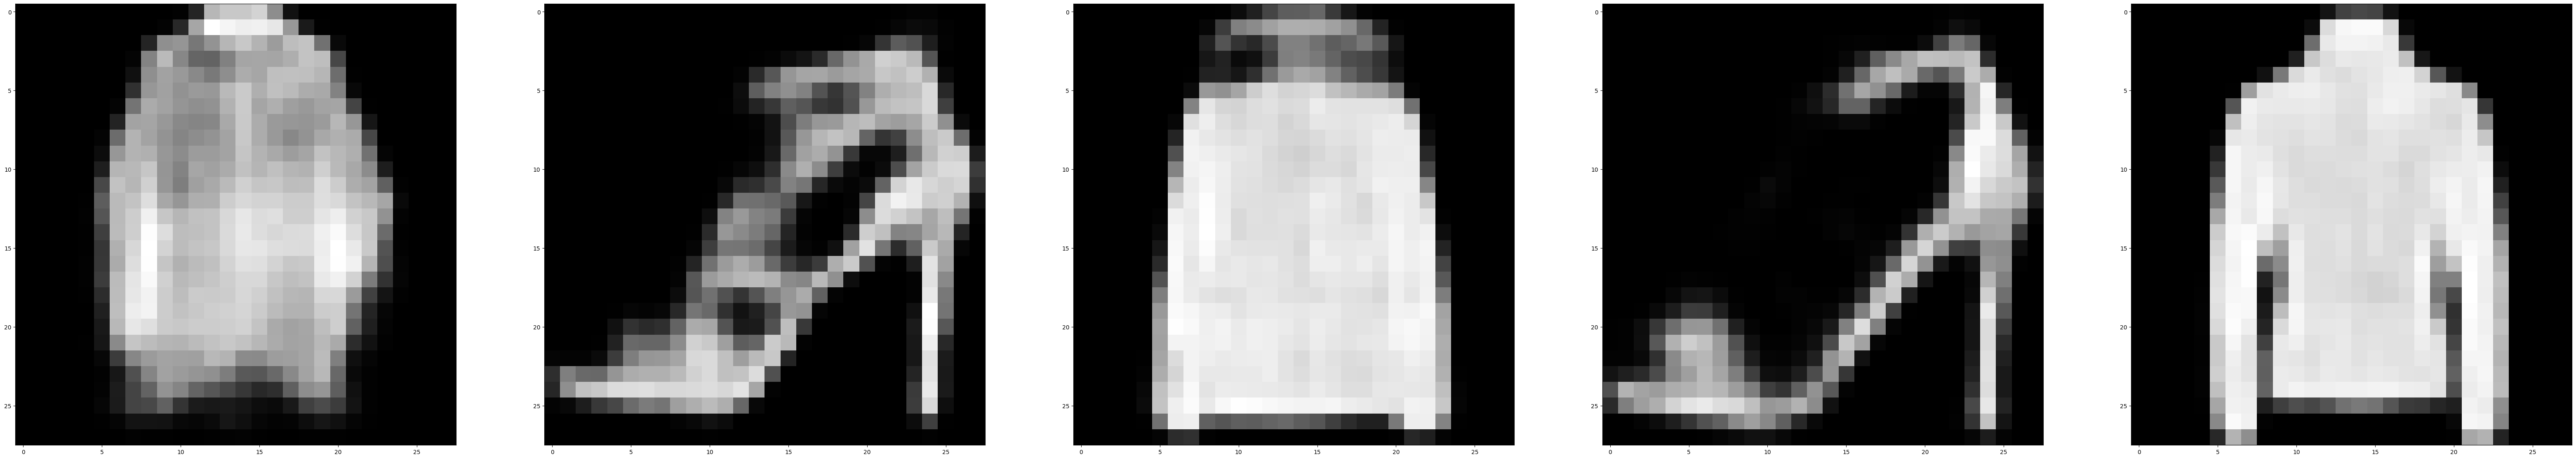

In [67]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_train_noisy_pred[i].reshape(28, 28), cmap='gray')
plt.show()

In [68]:
X_test_noisy_pred = model.predict(X_test_noisy)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


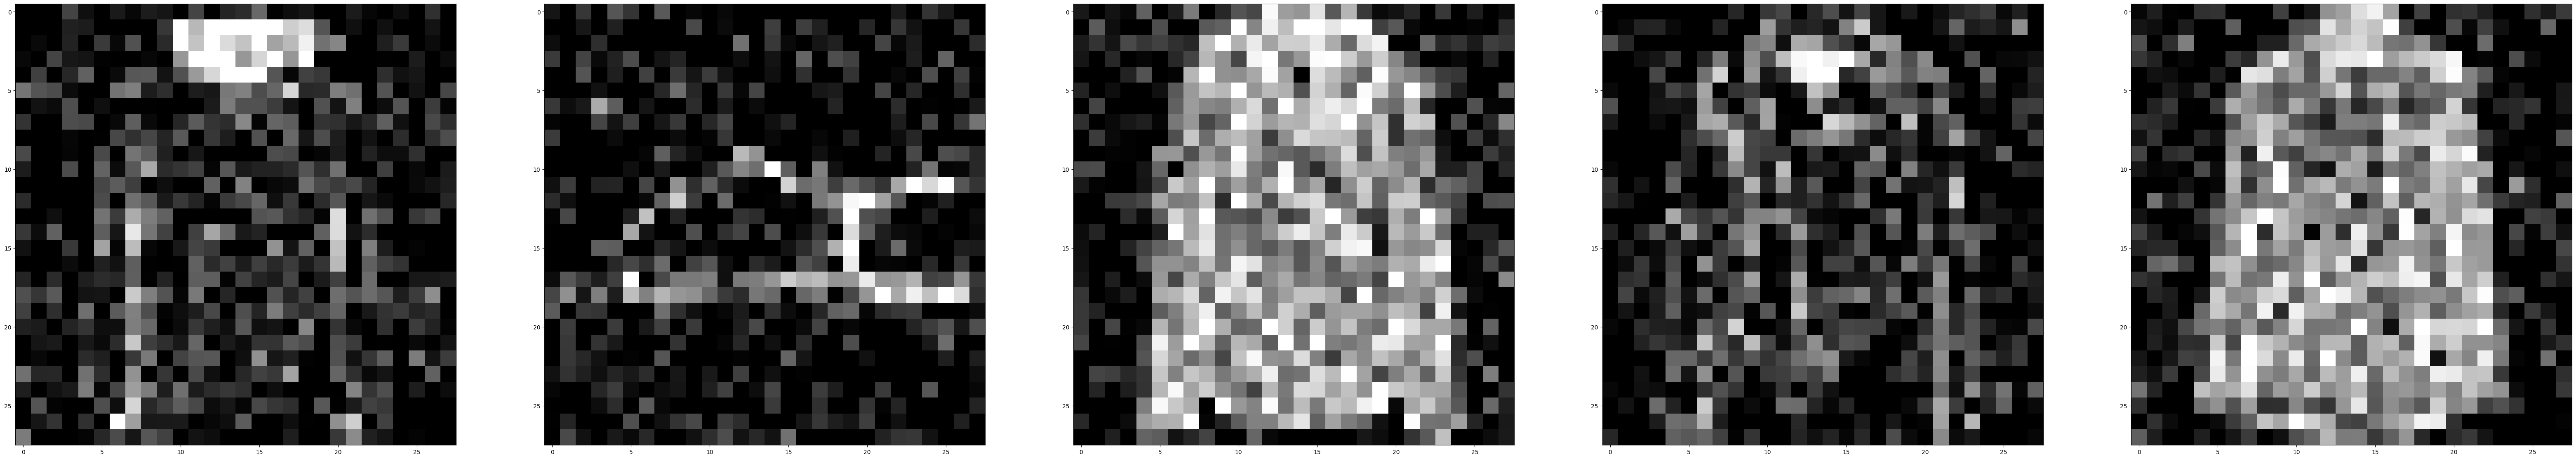

In [69]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
plt.show()

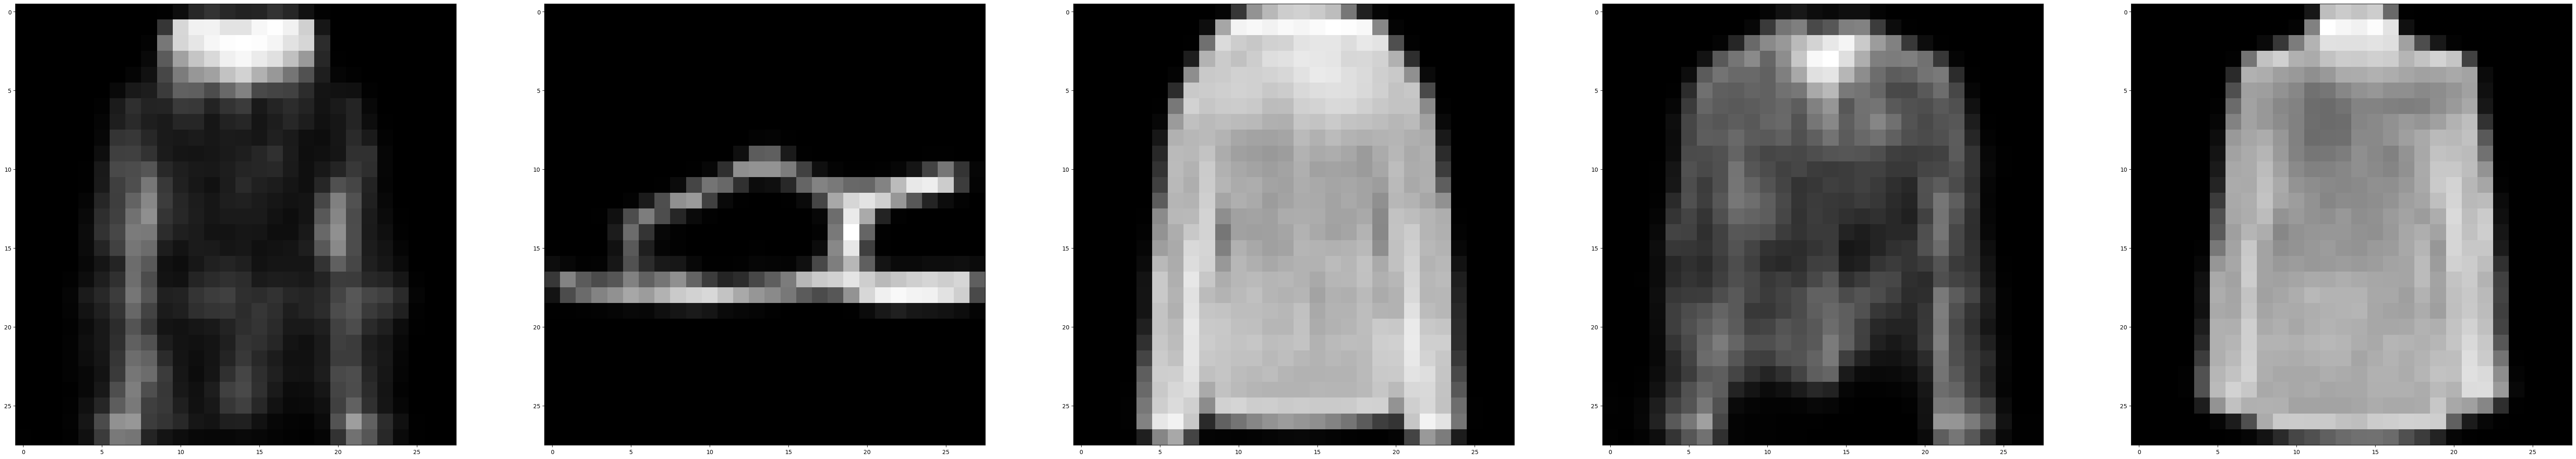

In [70]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_test_noisy_pred[i].reshape(28, 28), cmap='gray')
plt.show()

### SSIM Noisy Image train

In [71]:
ssim_scores = [ssim(X_train[i].squeeze(), X_train_noisy_pred[i].squeeze(), data_range=1.0) for i in range(len(X_train))]

# Average SSIM score
mean_ssim = np.mean(ssim_scores)
print("Mean SSIM:", mean_ssim)

Mean SSIM: 0.805452366497651


### SSIM Noisy Image test

In [72]:
ssim_scores = [ssim(X_test[i].squeeze(), X_test_noisy_pred[i].squeeze(), data_range=1.0) for i in range(len(X_test))]

# Average SSIM score
mean_ssim = np.mean(ssim_scores)
print("Mean SSIM:", mean_ssim)

Mean SSIM: 0.7850185397301627


# Conclusion
- Adding noisy images doesnt guarantee to improve the SSIM score
- We lost just a bit of the score, But the model now can predict noisy images and is more robust

# Hypertuning

In [75]:
model = Sequential()

# Encoder
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Decoder
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

# Compile model with reduced learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.fit(X_train_noisy, X_train,
          epochs=20,
          batch_size=128,
          shuffle=True,
          validation_data=(X_val_noisy, X_val))

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 

In [93]:
X_test_noisy_pred = model.predict(X_test_noisy)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


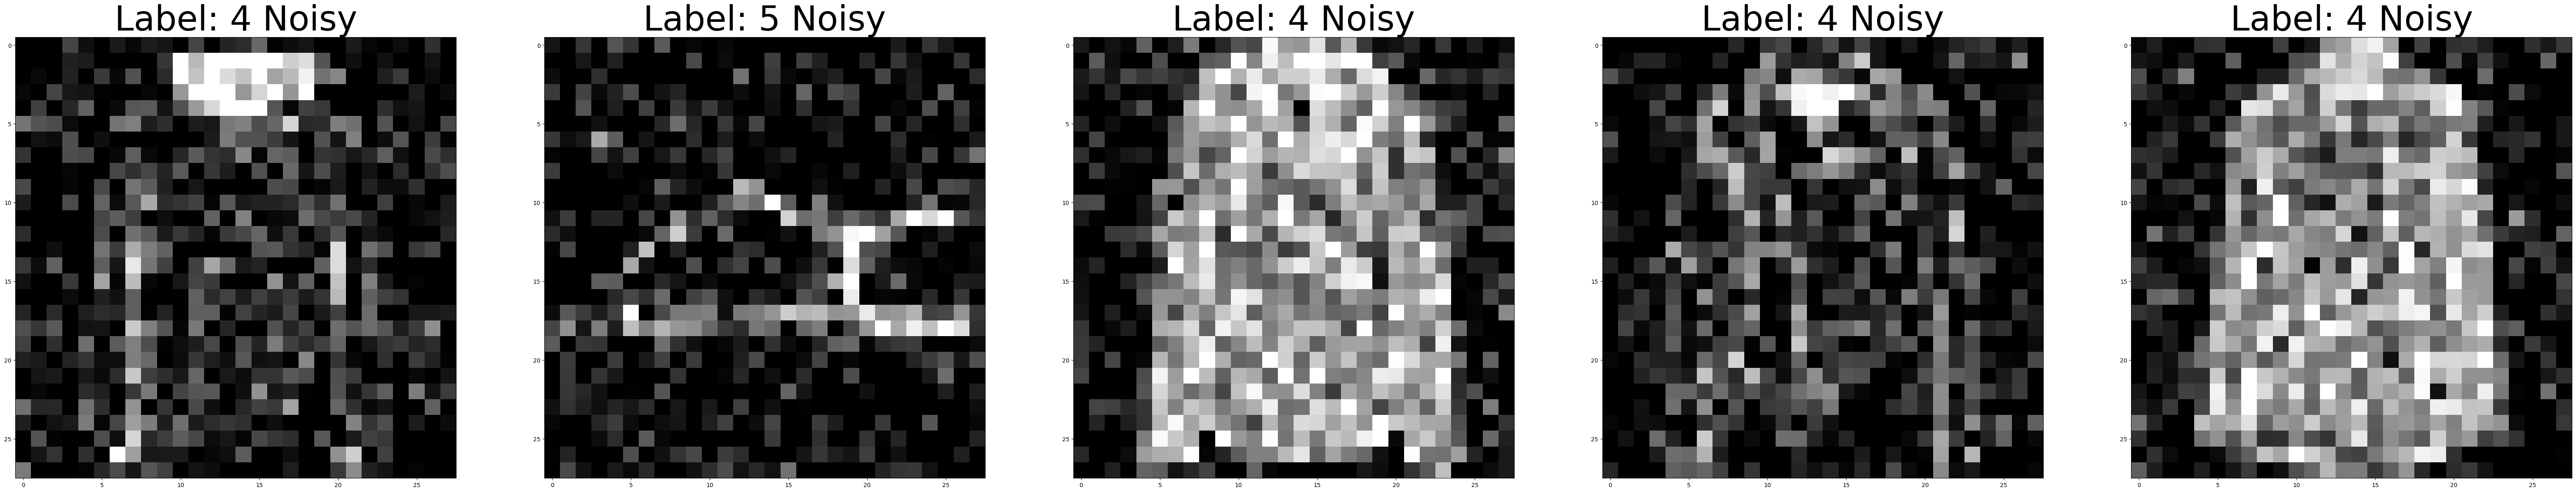

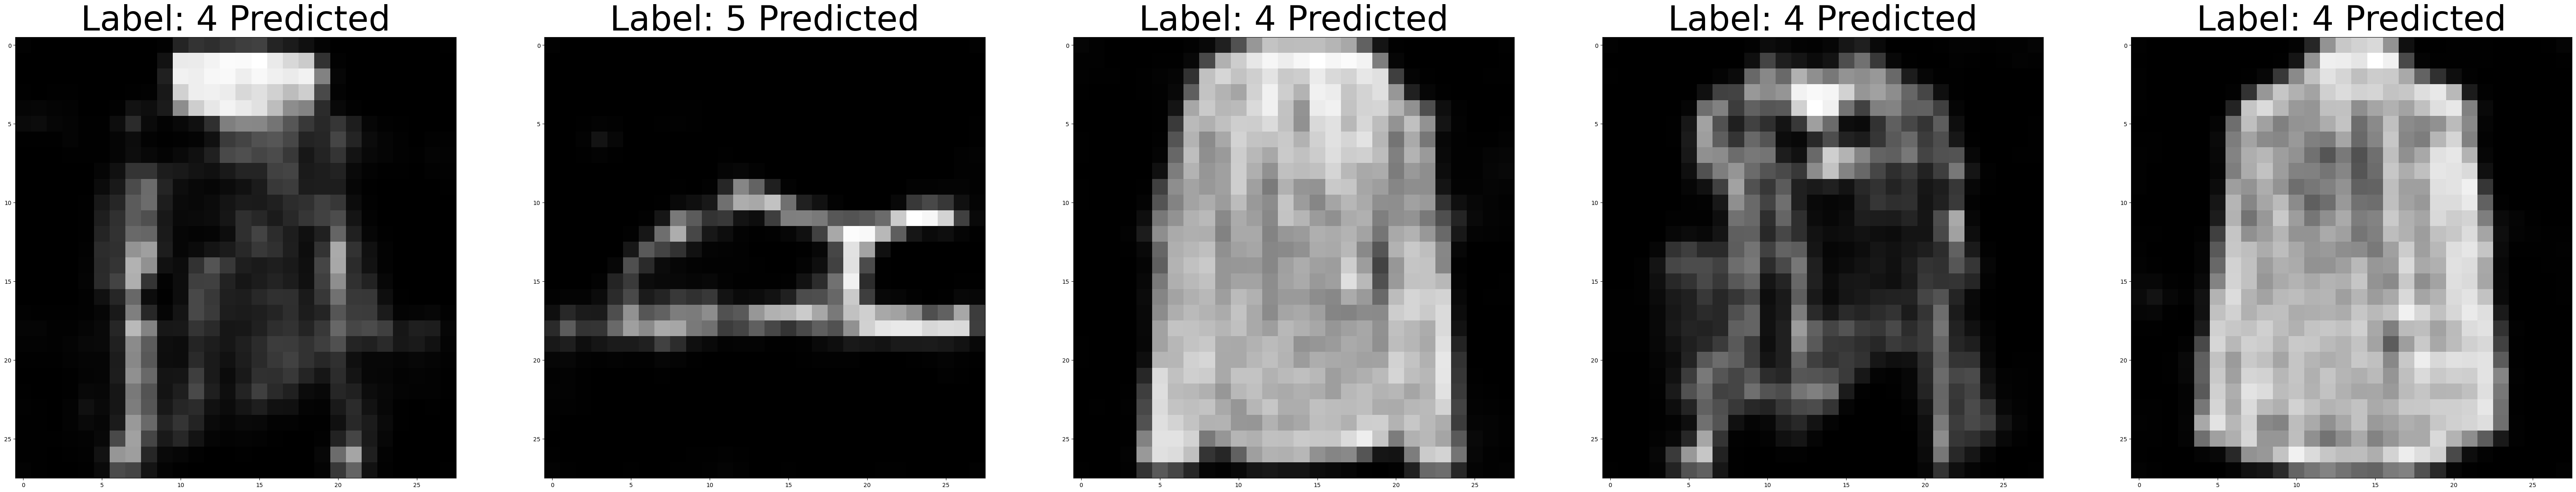

In [94]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_title((f'Label: {y_test[i]} Noisy'), fontsize=60)
        
plt.show()
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(X_test_noisy_pred[i].reshape(28, 28), cmap='gray')
    ax[i].set_title((f'Label: {y_test[i]} Predicted'), fontsize=60)
plt.show()

In [95]:
ssim_scores = [ssim(X_test[i].squeeze(), X_test_noisy_pred[i].squeeze(), data_range=1.0) for i in range(len(X_test))]

# Average SSIM score
mean_ssim = np.mean(ssim_scores)
print("Mean SSIM:", mean_ssim)

Mean SSIM: 0.8092152495710301


# Conclusion: 

- Hyptertuning the value of the hyperparameters doesnt improve much to the model result other than increasing epoch but will increase the training time
- But using smaller model with lower total params and increasing the epoch can improve and also reducing compute power in training time